In [3]:
import pandas as pd 
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('soilparent.csv')

In [9]:
df.head()

,OBJECTID_1,OBJECTID,AREA,PERIMETER,LCODE_GEN,SQKM,REC_NUM_1,Elev_min,Elev_max,Slope_med,Relief_med,linkfield,Landform,Parent_Mat,Dominant_S,CODE,NAME,Shape_Leng,Shape_Le_1,Shape_Area
0,1,1,0.004348,0.685688,16,46.330,1,2262,5888,38.8,374,16,TV,UF1,RGe,UF1,"Fluvial, calcareous",6.908456e+04,0.681751,0.004364
1,2,2,0.001948,0.289966,17,20.750,2,1803,8231,48.4,463,17,TM,MA2,LPi,MA2,"Gneiss, migmatite",2.985656e+04,0.288517,0.001943
2,3,3,2.014910,76.419707,17,21681.805,3,1803,8231,48.4,463,17,TM,MA2,LPi,MA2,"Gneiss, migmatite",7.679512e+06,74.353531,2.019582
3,4,4,0.008869,2.529719,16,94.682,4,2262,5888,38.8,374,16,TV,UF1,RGe,UF1,"Fluvial, calcareous",2.580557e+05,2.508825,0.008902
4,5,5,0.001761,0.372565,16,18.788,5,2262,5888,38.8,374,16,TV,UF1,RGe,UF1,"Fluvial, calcareous",3.820785e+04,0.367344,0.001765


In [11]:
soil_counts = df['NAME'].value_counts()
print(soil_counts)

NAME
slate, phyllite                 282
Fluvial non calcareous          183
Fluvial, calcareous             158
Quartzite                       101
Gneiss, migmatite                70
Colluvial, calcareous            67
Sandstone, greywacke, arkose     41
GG                               23
Lacustrine, non calcareous       15
WR                                1
RK                                1
Name: count, dtype: int64


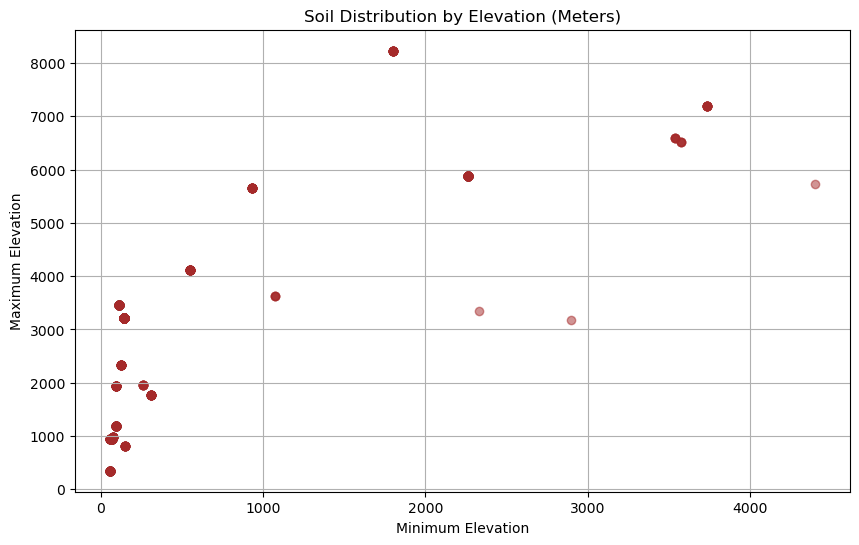

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Elev_min'], df['Elev_max'], alpha=0.5, c='brown')
plt.title('Soil Distribution by Elevation (Meters)')
plt.xlabel('Minimum Elevation')
plt.ylabel('Maximum Elevation')
plt.grid(True)
plt.show()

In [15]:
!pip install geopandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 17.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 10.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 34.9 MB/s eta 0:00:00


In [21]:
import geopandas as gpd
from shapely.geometry import Point

# Load the shapefile (Make sure soilparent.shp is in your folder)
# Geopandas automatically connects the .shp map with the .dbf data!
gdf = gpd.read_file("parentsoil/soilparent.shp")

# REPLACE these numbers with your coordinates from Google Maps
# Format: (Longitude, Latitude) -> (East-West, North-South)
# Example: Kathmandu is roughly 85.32, 27.71
my_long = 85.3240 
my_lat = 27.7172

# Create a point for your location
my_location = Point(my_long, my_lat)

# Find which polygon contains your point
my_soil_data = gdf[gdf.contains(my_location)]

# Print the result
if not my_soil_data.empty:
    print("Your Soil Parent Material is:", my_soil_data.iloc[0]['NAME'])
    print("Your Elevation Range:", my_soil_data.iloc[0]['Elev_min'], "to", my_soil_data.iloc[0]['Elev_max'])
else:
    print("Coordinates are outside the map area.")

Your Soil Parent Material is: Fluvial non calcareous
Your Elevation Range: 309 to 1763
